In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

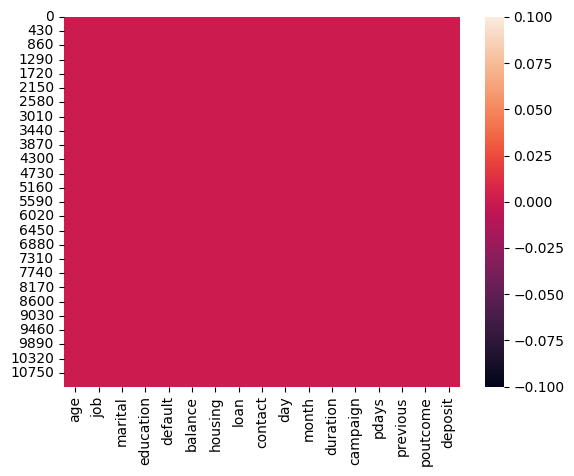

In [ ]:
sb.heatmap(df.isnull())
plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [ ]:
X=df.drop("deposit",axis=1)
Y=df['deposit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,Y_train.shape

((7813, 16), (7813,))

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X_train

array([[ 2.76552511,  0.15596991, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.16824122, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.33637636,  1.39500692, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-1.18565083, -0.77330785, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-0.00870481, -1.39282635,  1.27358436, ...,  3.07264515,
         4.3350541 , -0.47109973],
       [-0.42904267, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [ ]:
df['job'].value_counts()

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64

In [ ]:
df['marital'].value_counts()

1    6351
2    3518
0    1293
Name: marital, dtype: int64

In [ ]:
df['education'].value_counts()

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64

In [ ]:
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print(confusion_matrix(Y_test,Y_pred))
  print(classification_report(Y_test,Y_pred))
  return model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr=create_model(lr)

[[1441  319]
 [ 359 1230]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(random_state=1)

In [ ]:
df=create_model(dt)

[[1407  353]
 [ 372 1217]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [ ]:
dict={'Input Columns':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input Columns,IG
11,duration,0.354008
10,month,0.098357
5,balance,0.084437
0,age,0.077136
9,day,0.076581
8,contact,0.061793
13,pdays,0.047856
6,housing,0.042620
15,poutcome,0.036110
1,job,0.034220


In [ ]:
features=X.columns
from sklearn import tree

# plt.figure(figsize=(20,20))
# _=tree.plot_tree(dt,feature_names=features,filled=True)

In [ ]:
# for i in range(1,9):
#   dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
#   print("Max Depth : ",i)
#   print("confusion matrix and classification report")
#   dt=create_model(dt1)

In [ ]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=5)
print("confusion matrix and classification report")
dt=create_model(dt1)

confusion matrix and classification report
[[1316  444]
 [ 228 1361]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



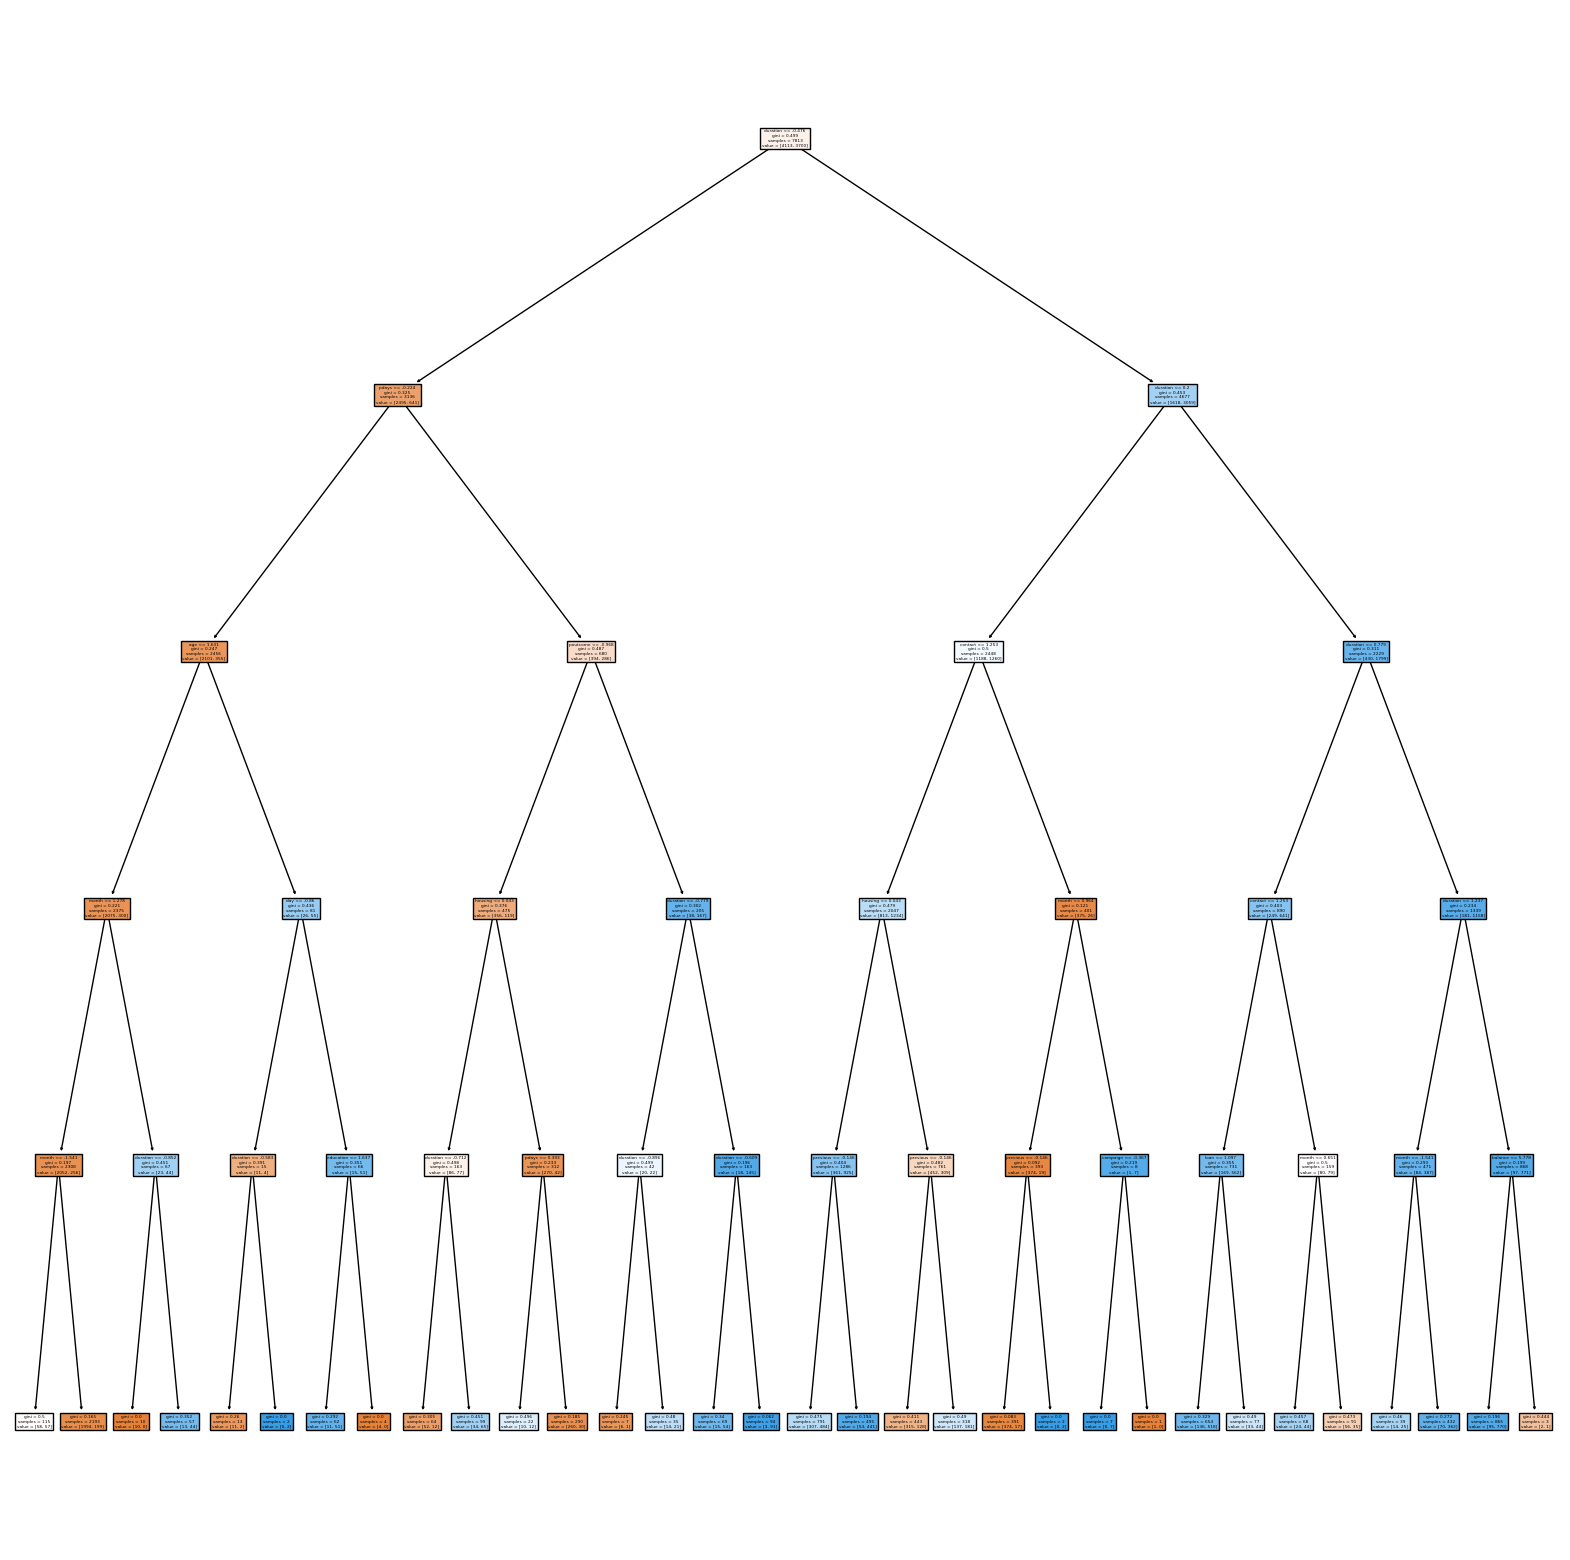

In [ ]:
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [ ]:
# for i in range(1,9):
#   dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
#   print("Max Depth : ",i)
#   print("confusion matrix and classification report")
#   dt1=create_model(dt1)

In [ ]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=6,criterion='entropy')
print("confusion matrix and classification report")
dt1=create_model(dt1)

confusion matrix and classification report
[[1364  396]
 [ 298 1291]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1760
           1       0.77      0.81      0.79      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [ ]:
# for i in range(45,101):
#   dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
#   print("Mim samples leaf : ",i)
#   print("confusion matrix and classification report")
#   dt1=create_model(dt1)

In [ ]:
dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
print("confusion matrix and classification report")
dt1=create_model(dt1)

confusion matrix and classification report
[[1379  381]
 [ 204 1385]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



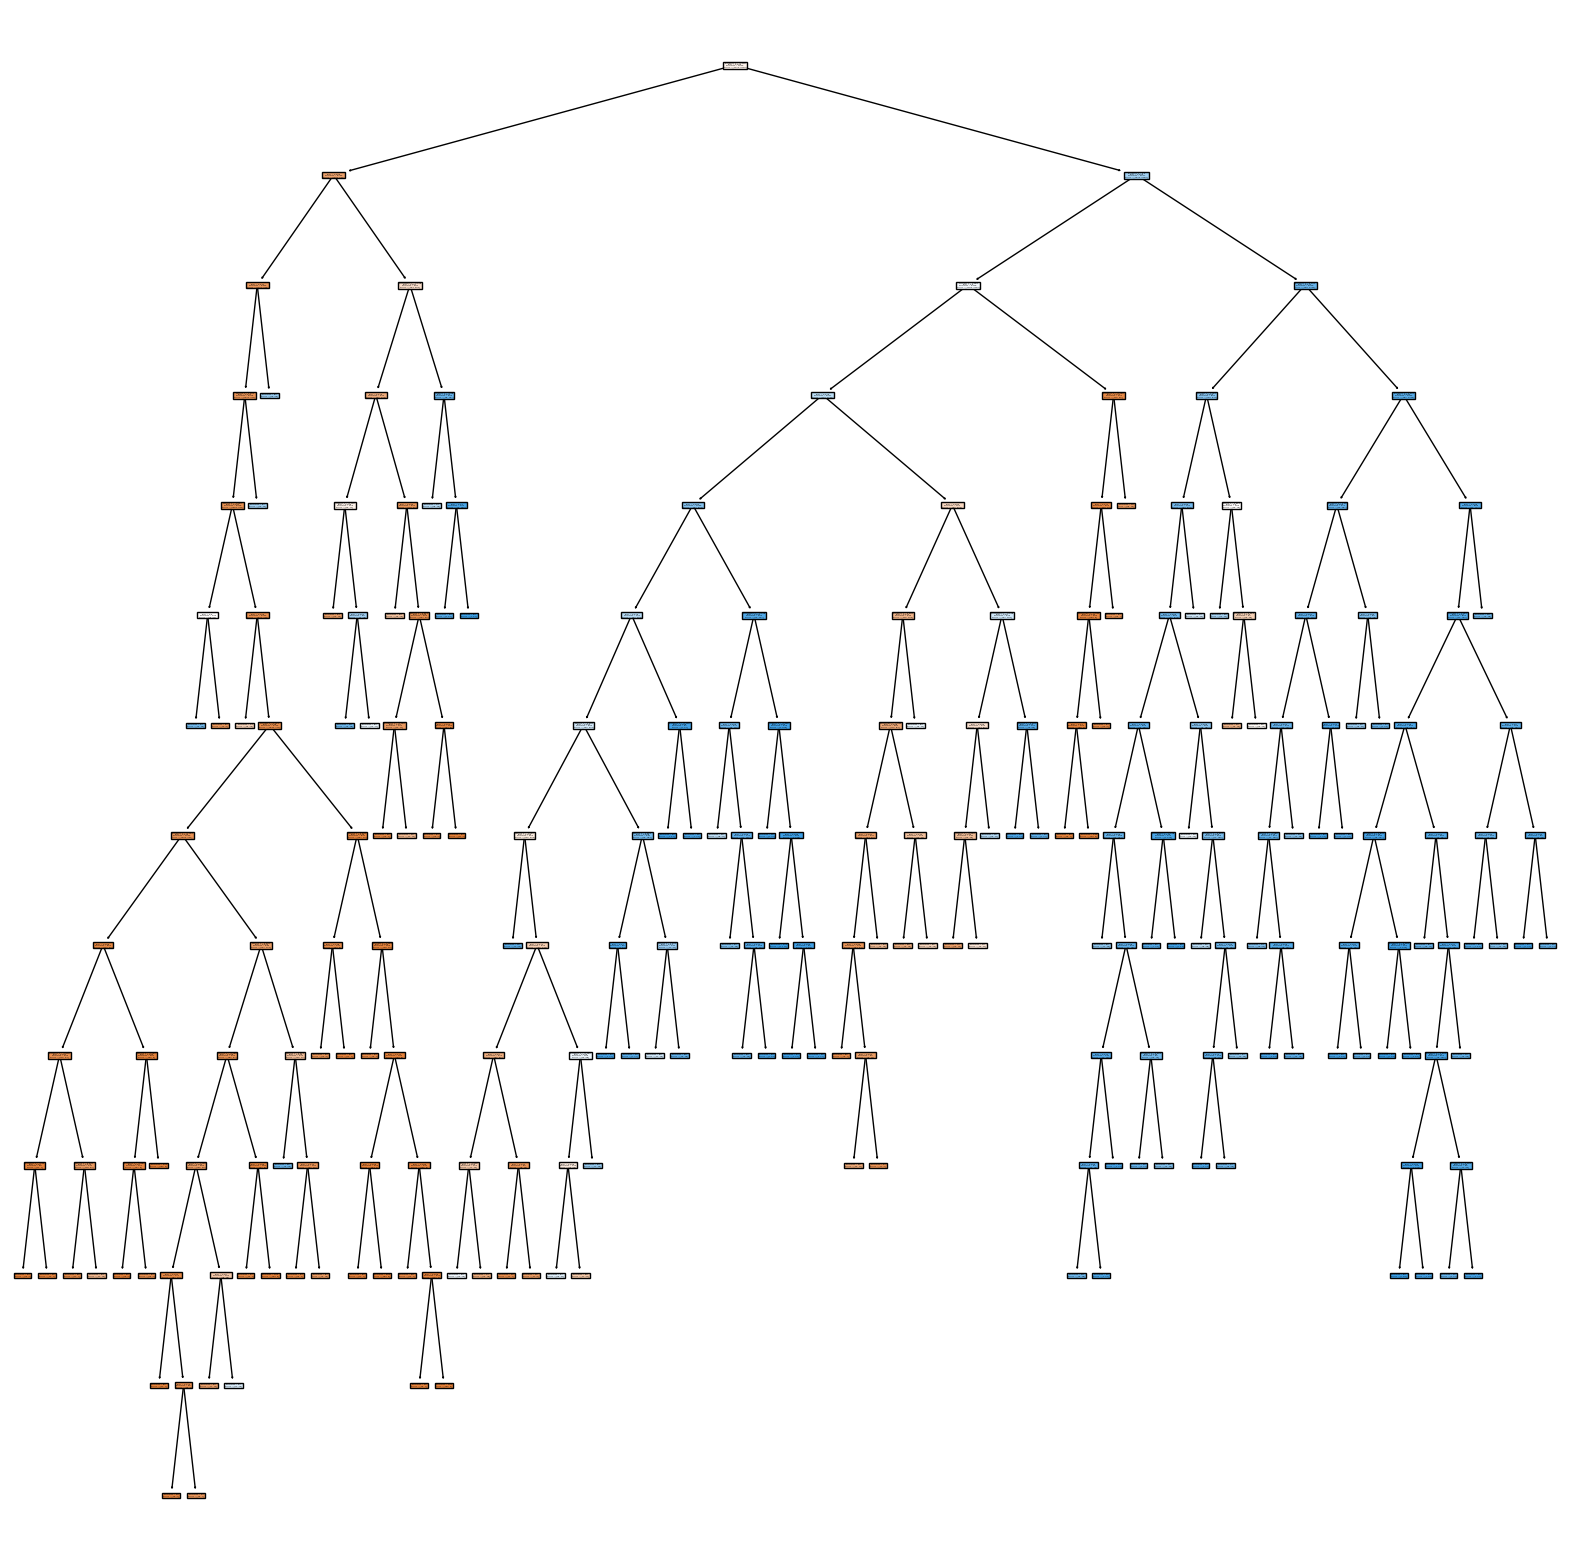

In [ ]:
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [ ]:
#best method in this dataset(bank.csv)
#DecisionTreeClassifier(Gini Index) with min_samples_leaf=45
#recall score=87% and accuracy 83%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# for i in range(10,101):
#   rfc=RandomForestClassifier(random_state=1,n_estimators=i)
#   print("No. of decision Tree : ",i)
#   rfc=create_model(rfc)
rfc=RandomForestClassifier(random_state=1,n_estimators=65)
rfc=create_model(rfc)

[[1435  325]
 [ 193 1396]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [ ]:
#recall score=0.88(88%)
#accuracy=0.85(85%)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# for i in range(1,17):
#   ada=AdaBoostClassifier(random_state=1,n_estimators=i)
#   print("No. of Decision stump means no. of inputs",i)
#   ada=create_model(ada)

In [ ]:
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
ada=create_model(ada)
ada.feature_importances_

[[1262  498]
 [ 310 1279]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.66666667, 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# for i in range(10,101):
#   gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
#   print("No. of decision tree :",i)
#   gbc=create_model(gbc)

In [ ]:
gbc=GradientBoostingClassifier(random_state=1,n_estimators=72)
gbc=create_model(gbc)

[[1438  322]
 [ 230 1359]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [ ]:
from xgboost import XGBClassifier

In [ ]:
#create object of XGBClassifier class and passing the parameter n_estimators means train how
#many decision tree and passing the second parameter reg_alpha=1 means true means handle
#overfitting of model automatic

#min n_estimators=10 and max=100
'''for i in range(10,101):
    xgb=XGBClassifier(random_state=1,n_estimators=i,reg_alpha=1)
    print("No. of Estimators means trees : ",i)
    #call function
    xgb=create_model(xgb)'''

xgb=XGBClassifier(random_state=1,n_estimators=30,reg_alpha=1)
#call function
xgb=create_model(xgb)


[[1459  301]
 [ 182 1407]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.82      0.89      0.85      1589

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [ ]:
xgb=XGBClassifier(random_state=1,estimators=30,reg_alpha=1)
xgb=create_model(xgb)

[[1467  293]
 [ 198 1391]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1760
           1       0.83      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc=LinearSVC(random_state=1)
svc=create_model(svc)

[[1444  316]
 [ 364 1225]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [ ]:
svc1=LinearSVC(random_state=1,C=0.9) #add error between 0-1 using C=0-1

In [ ]:
svc1=create_model(svc1)

[[1445  315]
 [ 364 1225]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [ ]:
#model is overfit

In [ ]:
from sklearn.svm import SVC

In [ ]:
p_svc=SVC(random_state=1,kernel='poly')
p_svc=create_model(p_svc)

[[1417  343]
 [ 311 1278]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [ ]:
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

[[1407  353]
 [ 262 1327]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [ ]:
svc2=SVC(random_state=1)
svc2=create_model(svc2)

[[1407  353]
 [ 262 1327]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

